In [85]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [86]:
!pip install altair

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [87]:
import sagemaker
import sagemaker.amazon.common as smac
import os
import altair as alt

In [88]:
df = pd.read_csv("crypto_compare.csv", index_col=0)

In [89]:
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [90]:
df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [91]:
# Cryptocurrencies on trading
df = df[df['IsTrading']==True]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [92]:
# Cryptocurrencies with a working algorithm
df_algor = df[df['Algorithm'] != "N/A"]
df_algor.head()


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [93]:
# Removing the "Istrading" column
df_crypto = df_algor.drop(columns="IsTrading")
df_crypto.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [94]:
# Removing rows with missing data
df_crypto.dropna(inplace = True)

In [95]:
# Checking isnull
for column in df_crypto.columns:
    print(f"Column {column} has {df_crypto[column].isnull().sum()} null values")


Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [96]:
# Removing rows with cryptocurrencies without coins mined
df_crypto = df_crypto[df_crypto['TotalCoinsMined'] != 0]
df_crypto.head()


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [97]:
# Dropping rows where there are 'N/A' text values

In [98]:
df_crypto.dropna()
df_crypto.tail()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [99]:
# Fetching the cryptocurrencies names 

In [100]:
X = df_crypto["CoinName"]


In [101]:
df_X = df_crypto[["CoinName"]]
df_X.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [102]:
# Removing the cryptocurrencies names
df_crypto_clean = df_crypto.drop(columns="CoinName")
df_crypto_clean.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [103]:
# Creating dummies variables for text features

In [104]:
df_dummies = pd.get_dummies(df_crypto_clean)

In [105]:
df_dummies.head()

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
42,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 42 to XBC
Columns: 379 entries, TotalCoinsMined to TotalCoinSupply_9999999
dtypes: float64(1), uint8(378)
memory usage: 225.1+ KB


In [107]:
# Standardizing data cScore
df_standar = StandardScaler().fit_transform(df_dummies)
print(df_standar[0:5])


[[-0.11674788 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.09358885 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [ 0.52587231 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.11635442 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.11438445 -0.0433555  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [108]:
# Reducing Dimensions Using PCA

In [109]:
# Applying PCA to reduce dimensions to 3 principal components

# Initialize PCA model
pca = PCA(n_components=3)

# Get three principal components for the df_standar.
redu_pca = pca.fit_transform(df_standar)

redu_pca

array([[-0.33902179, -0.05282467, -0.06983615],
       [-0.32292213, -0.05780602, -0.07291867],
       [ 0.54108344, -0.03818112,  0.05530967],
       ...,
       [-0.05325653, -0.22470241, -0.0441997 ],
       [-0.22406871, -0.16607429,  0.04041989],
       [-0.30683778, -0.04948198, -0.05935737]])

In [110]:
# Creating a DataFrame with the principal components data

In [111]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=redu_pca, columns=["principal component 1", "principal component 2", "principal component 3"])

df_pca.head()


,principal component 1,principal component 2,principal component 3
0,-0.339022,-0.052825,-0.069836
1,-0.322922,-0.057806,-0.072919
2,0.541083,-0.038181,0.055310
3,-0.229875,-0.135244,0.042421
4,-0.036487,-0.210520,0.040750


In [112]:
# Clustering Cryptocurrencies Using K-Means
# Finding the Best Value for k Using the Elbow Curve

In [113]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)


# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)



In [114]:
df_elbow.head()

,k,inertia
0,1,4886.014796
1,2,3436.596347
2,3,2218.680051
3,4,989.857831
4,5,331.491070


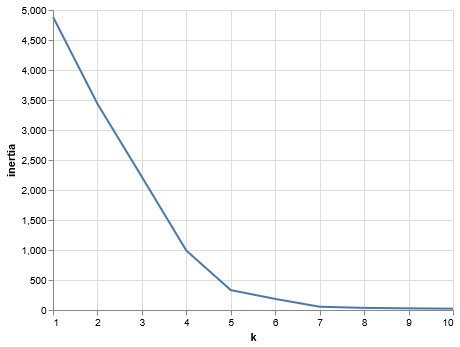

In [115]:
# running locally working in how altair must be recognized at sagemaker
chart = alt.Chart(df_elbow).mark_line().encode(
    x='k',
    y='inertia',
   )
chart

In [116]:
# Running K-Means with k=<you best value for k here

In [117]:
# Initialize the K-Means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Creating a new DataFrame including predicted clusters and cryptocurrencies features
df_pca["class"] = model.labels_
df_pca.head()


,principal component 1,principal component 2,principal component 3,class
0,-0.339022,-0.052825,-0.069836,0
1,-0.322922,-0.057806,-0.072919,0
2,0.541083,-0.038181,0.055310,0
3,-0.229875,-0.135244,0.042421,0
4,-0.036487,-0.210520,0.040750,0


In [118]:
# Creating a new DataFrame


In [119]:
df_crypto.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [120]:
df_pca.head()


,principal component 1,principal component 2,principal component 3,class
0,-0.339022,-0.052825,-0.069836,0
1,-0.322922,-0.057806,-0.072919,0
2,0.541083,-0.038181,0.055310,0
3,-0.229875,-0.135244,0.042421,0
4,-0.036487,-0.210520,0.040750,0


In [121]:
df_pca["symbol"] = df_X.index
df_pca.head()

,principal component 1,principal component 2,principal component 3,class,symbol
0,-0.339022,-0.052825,-0.069836,0,42
1,-0.322922,-0.057806,-0.072919,0,404
2,0.541083,-0.038181,0.055310,0,1337
3,-0.229875,-0.135244,0.042421,0,BTC
4,-0.036487,-0.210520,0.040750,0,ETH


In [122]:
df_crypto_clean.reset_index(inplace=True)
df_crypto_clean.head()

,index,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000
2,1337,X13,PoW/PoS,2.927942e+10,314159265359
3,BTC,SHA-256,PoW,1.792718e+07,21000000
4,ETH,Ethash,PoW,1.076842e+08,0


In [123]:
df_cd = pd.merge(df_crypto_clean, df_pca, how='inner', left_on = 'index', right_on = 'symbol', left_index=False)
df_cd.head()

,index,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class,symbol
0,42,Scrypt,PoW/PoS,4.199995e+01,42,-0.339022,-0.052825,-0.069836,0,42
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.322922,-0.057806,-0.072919,0,404
2,1337,X13,PoW/PoS,2.927942e+10,314159265359,0.541083,-0.038181,0.055310,0,1337
3,BTC,SHA-256,PoW,1.792718e+07,21000000,-0.229875,-0.135244,0.042421,0,BTC
4,ETH,Ethash,PoW,1.076842e+08,0,-0.036487,-0.210520,0.040750,0,ETH


In [124]:
df_cd.set_index('index',inplace=True)
df_cd.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class,symbol
index,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.339022,-0.052825,-0.069836,0,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.322922,-0.057806,-0.072919,0,404
1337,X13,PoW/PoS,2.927942e+10,314159265359,0.541083,-0.038181,0.055310,0,1337
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.229875,-0.135244,0.042421,0,BTC
ETH,Ethash,PoW,1.076842e+08,0,-0.036487,-0.210520,0.040750,0,ETH


In [125]:
clustered_df= df_cd[['Algorithm','ProofType','TotalCoinsMined','TotalCoinSupply','principal component 1','principal component 2','principal component 3','symbol','class']]
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,symbol,class
index,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.339022,-0.052825,-0.069836,42,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.322922,-0.057806,-0.072919,404,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,0.541083,-0.038181,0.055310,1337,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.229875,-0.135244,0.042421,BTC,0
ETH,Ethash,PoW,1.076842e+08,0,-0.036487,-0.210520,0.040750,ETH,0


In [126]:
# Adding CoinName column to clustered_df and changing the name to df


In [127]:
clustered_df.reset_index(inplace=True)
df_X.reset_index(inplace=True)

In [128]:
df=pd.merge(clustered_df, df_X, on='index')
df.head()


,index,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,symbol,class,CoinName
0,42,Scrypt,PoW/PoS,4.199995e+01,42,-0.339022,-0.052825,-0.069836,42,0,42 Coin
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.322922,-0.057806,-0.072919,404,0,404Coin
2,1337,X13,PoW/PoS,2.927942e+10,314159265359,0.541083,-0.038181,0.055310,1337,0,EliteCoin
3,BTC,SHA-256,PoW,1.792718e+07,21000000,-0.229875,-0.135244,0.042421,BTC,0,Bitcoin
4,ETH,Ethash,PoW,1.076842e+08,0,-0.036487,-0.210520,0.040750,ETH,0,Ethereum


In [129]:
### Visualizing Results

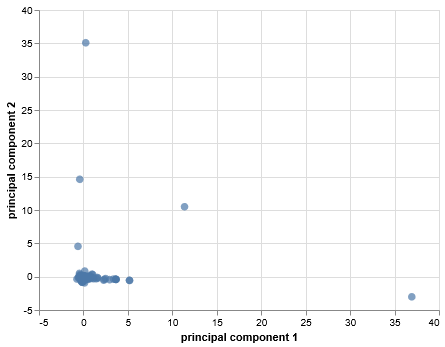

In [130]:
# working in how import altair is recognized on sagemaker
cluster_chart=alt.Chart(df).mark_circle(size=60).encode(
   x='principal component 1',
   y='principal component 2',
   tooltip=['principal component 3']).interactive()
  
cluster_chart

In [131]:
# Altair scatter plot to visualize the tradable currencies Total Coins Mined and Total Coin Supply

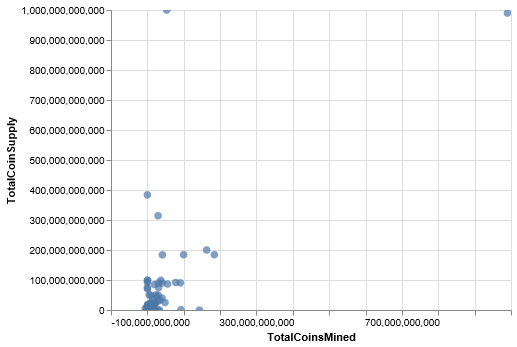

In [132]:

df = df.astype({"TotalCoinSupply":'float64'})
trade_chart=alt.Chart(df).mark_circle(size=60).encode(
  x='TotalCoinsMined',
  y='TotalCoinSupply',
  tooltip=['CoinName']).interactive()
trade_chart

In [133]:
df_table = df[["CoinName", "Algorithm", "ProofType", "TotalCoinsMined", "TotalCoinSupply", "class"]]
display(df_table.head(10))

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,0
1,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,0
2,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11,0
3,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07,0
4,Ethereum,Ethash,PoW,1.076842e+08,0.000000e+00,0
5,Litecoin,Scrypt,PoW,6.303924e+07,8.400000e+07,0
6,Dash,X11,PoW/PoS,9.031294e+06,2.200000e+07,0
7,Monero,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,0
8,Ethereum Classic,Ethash,PoW,1.133597e+08,2.100000e+08,0
9,ZCash,Equihash,PoW,7.383056e+06,2.100000e+07,0
